# Libraries

In [1]:
# Load librarie
import pandas as pd
import numpy as np

# Reading and adding label


In [2]:
# Load fake news dataset
fake = pd.read_csv("Fake.csv")
# Load true news dataset
true = pd.read_csv("True.csv")
# Add label
fake["Label"] = 1
true["Label"] = 0
fake

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


# Combining 

In [3]:
# Combining both into new dataframe "news_dataset"
frames = [fake, true]
news_dataset= pd.concat(frames)
news_dataset

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


# Shuffling data

In [4]:
news_dataset = news_dataset .sample(frac = 1)
news_dataset.head()

,title,text,subject,date,Label
19036,DOES NANCY NEED MEDICAL ATTENTION? Watch As Na...,Thank you to the American Mirror for putting t...,left-news,"Mar 4, 2017",1
14812,"After U.S. visit, South Sudan's Kiir orders un...",UNITED NATIONS (Reuters) - South Sudan s Presi...,worldnews,"November 14, 2017",0
3274,The Internet Loses It Over RNC’s Bizarre Stat...,The Republican National Committee released a b...,News,"December 25, 2016",1
23203,FBI REDUX: What’s Behind New Probe into Hillar...,21st Century Wire says In a stunning turn of e...,Middle-east,"October 28, 2016",1
20208,Indonesia tightens rules to curb money launder...,JAKARTA (Reuters) - Indonesia has issued new r...,worldnews,"September 13, 2017",0


# Pre-Processing

In [5]:
import re 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 

In [6]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
news_dataset= news_dataset.drop(['title','subject','date'],axis=1)

In [9]:
news_dataset

,text,Label
19036,Thank you to the American Mirror for putting t...,1
14812,UNITED NATIONS (Reuters) - South Sudan s Presi...,0
3274,The Republican National Committee released a b...,1
23203,21st Century Wire says In a stunning turn of e...,1
20208,JAKARTA (Reuters) - Indonesia has issued new r...,0
...,...,...
9024,New e-mails obtained by media outlets show tha...,1
3961,Donald Trump once again bullied NBC correspond...,1
7987,Sometimes you could wonder if some of the peop...,1
5052,WASHINGTON (Reuters) - Republicans in the U.S....,0


# Stemming text

#### Stemming is the process of reducing a word to its Root word 
#### example :
##### programmation : programme
##### eating : eat 
##### books : book

In [10]:
port_stem = PorterStemmer()

In [11]:
def stemming(content):
    strmmed_content = re.sub('[^a-zA-Z]',' ',content)
    strmmed_content = strmmed_content.lower() # Characters are lowercase
    strmmed_content = strmmed_content.split() # Splits a string into an ordered list of substrings
    strmmed_content = [port_stem.stem(word) for word in  strmmed_content   if not word in stopwords.words('english')]
    strmmed_content  = ' '.join( strmmed_content )
    return  strmmed_content

In [13]:
news_dataset['text'] = news_dataset['text'].apply(stemming)

In [14]:
print(news_dataset['text'])

19036    thank american mirror put video togeth show na...
14812    unit nation reuter south sudan presid salva ki...
3274     republican nation committe releas bizarr chris...
23203    st centuri wire say stun turn event day presid...
20208    jakarta reuter indonesia issu new regul aim cu...
                               ...                        
9024     new e mail obtain media outlet show coordin ch...
3961     donald trump bulli nbc correspond kati tur ral...
7987     sometim could wonder peopl run republican nomi...
5052     washington reuter republican u congress move r...
21126    good news today al jazeera dead gone kaput rem...
Name: text, Length: 44898, dtype: object


# Defining dependent and independent variables

In [15]:
X = news_dataset['text'].values
y = news_dataset['Label'].values

In [16]:
print(y)

[1 0 1 ... 1 0 1]


# Data Transformation with CountVectorizer()

###          -   converting the textuel data to numerical data

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
x = count_vect.fit_transform(X)

In [17]:
print(x)

  (0, 69656)	1
  (0, 17553)	1
  (0, 70983)	5
  (0, 32652)	14
  (0, 14055)	8
  (0, 25213)	1
  (0, 45887)	1
  (0, 73486)	5
  (0, 19352)	2
  (0, 7679)	1
  (0, 33242)	4
  (0, 50943)	1
  (0, 61199)	1
  (0, 48381)	1
  (0, 18277)	2
  (0, 20041)	2
  (0, 31452)	5
  (0, 84920)	9
  (0, 84973)	1
  (0, 641)	1
  (0, 63823)	1
  (0, 14694)	1
  (0, 46258)	2
  (0, 79311)	1
  (0, 26088)	1
  :	:
  (44897, 18359)	1
  (44897, 49762)	1
  (44897, 17898)	1
  (44897, 29588)	1
  (44897, 49795)	1
  (44897, 82998)	2
  (44897, 7527)	2
  (44897, 77156)	1
  (44897, 69066)	1
  (44897, 35858)	1
  (44897, 25957)	1
  (44897, 72136)	1
  (44897, 16341)	1
  (44897, 43368)	1
  (44897, 8879)	1
  (44897, 76731)	1
  (44897, 31609)	1
  (44897, 54382)	1
  (44897, 86185)	2
  (44897, 4060)	5
  (44897, 12957)	1
  (44897, 38219)	1
  (44897, 81494)	1
  (44897, 39031)	1
  (44897, 38960)	1


In [18]:
print(x.shape)

(44898, 89633)


# Splitting Training and Testing


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=2)

# Best Model in Machine Learning 

## ML XGBOOST

In [20]:
from xgboost import XGBClassifier

In [21]:
xgb = XGBClassifier()
tfidf = xgb.fit(X_train,Y_train)

C:\Users\ASUS1\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:27:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [22]:
from sklearn.metrics import accuracy_score
tfidf_val_predict = tfidf.predict( X_test)
print('Tfidf Vectorizer score :',accuracy_score(Y_test, tfidf_val_predict))

Tfidf Vectorizer score : 0.9983296213808464


In [24]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Precision = ', precision_score(tfidf_val_predict, Y_test))
print('Recall = ', recall_score(tfidf_val_predict, Y_test))
print('f1_score = ', f1_score(tfidf_val_predict, Y_test))

Precision =  0.9976575809199318
Recall =  0.99914693964598
f1_score =  0.998401704848162


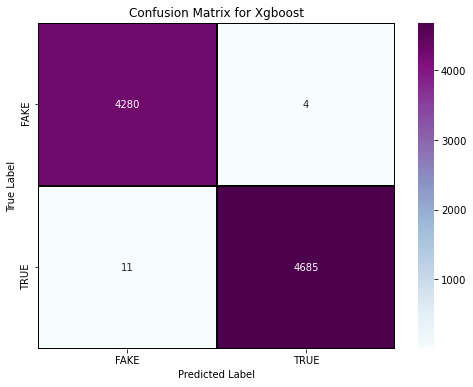

In [25]:
from sklearn.metrics import confusion_matrix  
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test, tfidf_val_predict)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "BuPu", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Xgboost')
plt.savefig('confision matrix for XGBoost',dpi=300)


In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
pred_prob = xgb.predict_proba(X_test)

In [28]:
fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
# auc scores
auc_score = roc_auc_score(Y_test, pred_prob[:,1])
print(auc_score)

0.999893054183627


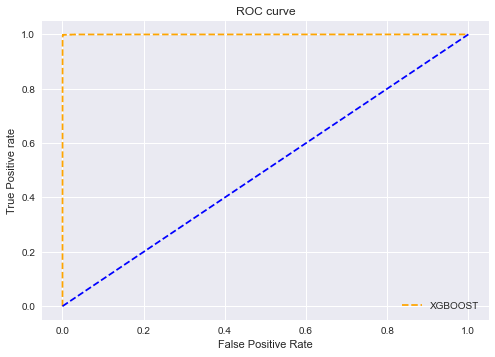

In [29]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='XGBOOST')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('roc of XGBOOST ',dpi=300)
plt.show();

# Best Deep Learning Models

## MLP

In [88]:
from sklearn.neural_network import MLPClassifier

mlp_clfMLP = MLPClassifier(hidden_layer_sizes=(500,450,300),
                        max_iter = 800,activation = 'tanh',
                        solver = 'sgd')

mlp_clfMLP.fit(X_train, Y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(500, 450, 300),
              max_iter=800, solver='sgd')

In [89]:
y_predMLP= mlp_clfMLP.predict(X_test)

print('Accuracy: {:.7f}'.format(accuracy_score(Y_test, y_predMLP)))

Accuracy: 0.9964365


In [90]:
print('Precision = ', precision_score(y_predMLP, Y_test))
print('Recall = ', recall_score(y_predMLP, Y_test))
print('f1_score = ', f1_score(y_predMLP, Y_test))

Precision =  0.9965928449744463
Recall =  0.9965928449744463
f1_score =  0.9965928449744463


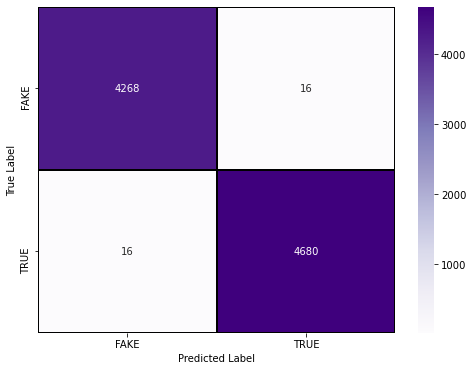

In [91]:
cm = confusion_matrix(Y_test, y_predMLP)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "Purples", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.savefig('confusion matrix for MLP',dpi=300)

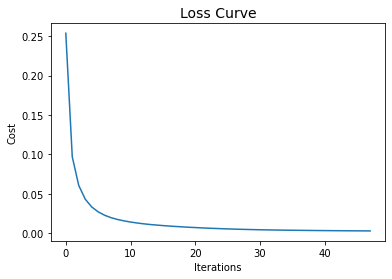

In [94]:
plt.plot(mlp_clfMLP.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

## Tensorflow

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_features=600)
x = count_vect.fit_transform(X).toarray()

In [66]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x, y, test_size = 0.2, random_state=2)

In [67]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
max_features = X_train2.shape[1]
max_features

600

In [68]:
#Building Model
model_Tensorflow = Sequential()
model_Tensorflow.add(Dense(150, activation='tanh', kernel_initializer='he_normal', input_shape=(max_features,)))
model_Tensorflow.add(Dense(100, activation='tanh', kernel_initializer='he_normal'))
model_Tensorflow.add(Dense(50, activation='tanh', kernel_initializer='he_normal'))
model_Tensorflow.add(Dense(10, activation='tanh', kernel_initializer='he_normal'))
model_Tensorflow.add(Dense(1, activation='sigmoid'))


In [70]:
#Compile The Model
model_Tensorflow.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
#Fit The Model
model_Tensorflow.fit(X_train2, Y_train2, epochs=50, batch_size=32,verbose=1)

Epoch 1/50
1123/1123 [==============================] - 4s 3ms/step - loss: 0.0613 - accuracy: 0.9805
Epoch 2/50
1123/1123 [==============================] - 3s 3ms/step - loss: 0.0242 - accuracy: 0.9936
Epoch 3/50
1123/1123 [==============================] - 3s 3ms/step - loss: 0.0162 - accuracy: 0.9954
Epoch 4/50
1123/1123 [==============================] - 3s 3ms/step - loss: 0.0122 - accuracy: 0.9963
Epoch 5/50
1123/1123 [==============================] - 4s 3ms/step - loss: 0.0085 - accuracy: 0.9977
Epoch 6/50
1123/1123 [==============================] - 4s 3ms/step - loss: 0.0065 - accuracy: 0.9982
Epoch 7/50
1123/1123 [==============================] - 3s 3ms/step - loss: 0.0077 - accuracy: 0.9975
Epoch 8/50
1123/1123 [==============================] - 3s 3ms/step - loss: 0.0041 - accuracy: 0.9988
Epoch 9/50
1123/1123 [==============================] - 3s 3ms/step - loss: 0.0039 - accuracy: 0.9989
Epoch 10/50
1123/1123 [==============================] - 4s 3ms/step - loss: 0.003

In [72]:
loss2, acc2 = model_Tensorflow.evaluate(X_test2, Y_test2, verbose=1)
print('Test Accuracy: %.6f' % acc2)

281/281 [==============================] - 1s 2ms/step - loss: 0.0282 - accuracy: 0.9962
Test Accuracy: 0.996214


In [73]:
y_pred=model_Tensorflow.predict(X_test2)

binary_predictions =[]

for i in y_pred:
    if i >=0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

In [74]:
# Importing metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("Model accuracy is ",accuracy_score(binary_predictions,Y_test2)*100)
print("Model precision is ",precision_score(binary_predictions,Y_test2)*100)
print("Model recall is ",recall_score(binary_predictions,Y_test2)*100)
print("Model f1_score is ",f1_score(binary_predictions,Y_test2)*100)

Model accuracy is  99.62138084632517
Model precision is  99.61554891072191
Model recall is  99.65811965811966
Model f1_score is  99.63682973723564


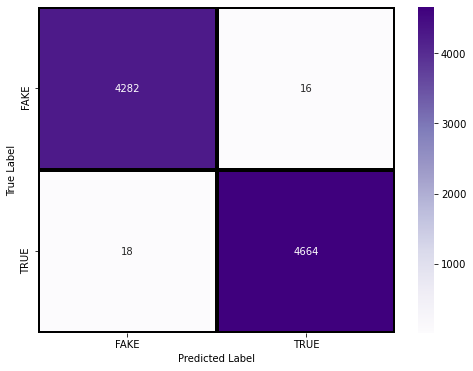

In [75]:
cm = confusion_matrix(Y_test2, binary_predictions)
cm = pd.DataFrame(cm , index = [i for i in range(2)] , columns = [i for i in range(2)])
plt.figure(figsize = (8,6))
sns.heatmap(cm,cmap= "Purples", linecolor = 'black' , linewidth = 3 , annot = True, fmt='' , xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#plt.title('Confusion Matrix for tensorflow')
plt.savefig('confusion matrix for tensorflow 5',dpi=300)

## Pytorch

In [24]:
import torch
import torch.nn as nn

In [25]:
vectorizer_text = CountVectorizer(stop_words="english",max_features=8000)
text_matrix = vectorizer_text.fit_transform(X).toarray()
print("Finished")

Finished


In [26]:
print(news_dataset.shape)

print(text_matrix.shape)

# Creating Y
y = news_dataset.Label

# Creating X
x=text_matrix

(44898, 2)
(44898, 8000)


In [27]:

from sklearn.model_selection import train_test_split

# Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(x,np.array(y),test_size=0.2,random_state=2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35918, 8000)
(8980, 8000)
(35918,)
(8980,)


In [28]:
import torch.nn as nn

class ANN(nn.Module):
    def __init__(self):
        super(ANN,self).__init__() # Inhertiting
        
        self.linear1 = nn.Linear(8000,6000) # IN 8000 OUT 6000
        self.relu1 = nn.ReLU() # activation function 1
        
        self.linear2 = nn.Linear(6000,3000) # IN 6000 OUT 3000
        self.relu2 = nn.ReLU() # activation function 2
        
        self.linear3 = nn.Linear(3000,1000) # IN 3000 OUT 1000
        self.relu3 = nn.ReLU() # activation function 3
        
        self.linear4 = nn.Linear(1000,100) # IN 1000 OUT 100
        self.relu4 = nn.ReLU() # activation function 4
        
        self.linear5 = nn.Linear(100,20) # IN 100 OUT 20
        self.relu5 = nn.ReLU() # activation function 5
        
        self.linear6 = nn.Linear(20,2) # IN 20 OUT 2 | OUTPUT  
    
    def forward(self,x):
        out = self.linear1(x) # Input Layer 
        out = self.relu1(out)
        
        out = self.linear2(out) # Hidden Layer 1 
        out = self.relu2(out)
        
        out = self.linear3(out) # Hidden Layer 2 
        out = self.relu3(out)
        
        out = self.linear4(out) # Hidden Layer 3 
        out = self.relu4(out)
        
        out = self.linear5(out) # Hidden Layer 4
        out = self.relu5(out)
        
        out = self.linear6(out) # Output Layer
        
        return out

model = ANN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
error = nn.CrossEntropyLoss() #binary_crossentropy


In [29]:
# Converting numpy arrays into pytorch tensors
X_train = torch.Tensor(X_train)

# You must convert it into LongTensor. I did it once
Y_train = torch.Tensor(Y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
Y_test = torch.Tensor(Y_test)

EPOCHS = 150

for epoch in range(EPOCHS):
    
    # Clearing gradients
    optimizer.zero_grad()
    
    # Forward Propagation
    outs = model(X_train)
    
    # Computing Loss
    loss = error(outs,Y_train)
    
    # Backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # Printing loss
    print(f"Loss after iteration {epoch} is {loss}")

Loss after iteration 0 is 0.692341685295105
Loss after iteration 1 is 51.847320556640625
Loss after iteration 2 is 24.231130599975586
Loss after iteration 3 is 1.1654441356658936
Loss after iteration 4 is 3.002622365951538
Loss after iteration 5 is 0.4913569390773773
Loss after iteration 6 is 0.3809521198272705
Loss after iteration 7 is 0.3361324369907379
Loss after iteration 8 is 0.20756351947784424
Loss after iteration 9 is 0.28264811635017395
Loss after iteration 10 is 0.14120054244995117
Loss after iteration 11 is 0.16041211783885956
Loss after iteration 12 is 0.14502209424972534
Loss after iteration 13 is 0.10261676460504532
Loss after iteration 14 is 0.09262830764055252
Loss after iteration 15 is 0.08172986656427383
Loss after iteration 16 is 0.054974425584077835
Loss after iteration 17 is 0.0437433160841465
Loss after iteration 18 is 0.04041017219424248
Loss after iteration 19 is 0.03506314754486084
Loss after iteration 20 is 0.027664797380566597
Loss after iteration 21 is 0.024

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# Prediction
y_head = model(X_test)
print(y_head[0])

# Converting Prediction into labels
y_pred = torch.max(y_head,1)[1]
print(y_pred[0])

# Accuracy score
print(" accuracy = ",accuracy_score(y_pred,Y_test)*100)
print(" precision = ",precision_score(y_pred,Y_test)*100)
print(" recall = ",recall_score(y_pred,Y_test)*100)
print(" f1_score = ",f1_score(y_pred,Y_test)*100)

tensor([106.7690,  28.8046], grad_fn=<SelectBackward0>)
tensor(0)
 accuracy =  98.88641425389754
 precision =  99.39694163256515
 recall =  98.46383614252187
 f1_score =  98.92818863879957


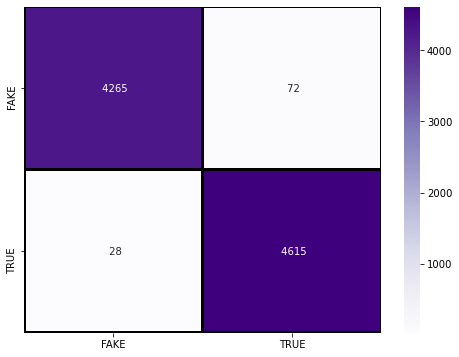

In [34]:
confusion_matrix = confusion_matrix(y_pred=y_pred,y_true=Y_test) #y_true=y_test
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(confusion_matrix,cmap= "Purples", linecolor = 'black' ,annot=True,fmt=" ",linewidths=2,xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'])
plt.show()